In [1]:
import netpixi
from netpixi.integration.gt import Graph
from netpixi.integration.gt import *
import seaborn as sns
from regression.integration.gt import *

import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore") # Disable all warnings

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


In [2]:
# Criando o grafo
g = Graph(directed=False) # não-dirigido

# Criando um dicionário estilo {nome do repositorio:[topicos]}
repositorio_e_topicos = {}

# Criando os vértices & preenchendo o dicionário
with open('Github_data_refatorado.csv', "r") as arquivo:
    arquivo.readline()
    for linha in arquivo:
        try:
            div = linha.split(',')
            
            top_tag = linha.split('[')[1].split(']')[0].replace("'", "").replace(" ", "").split(",")
            repositorio = div[3]
            
            if not g.has_vertex(repositorio):
                g.add_vertex(repositorio)

            repositorio_e_topicos[repositorio] = top_tag
            
        except:
            continue

In [3]:
# Quantidade de vértices
quantidade_de_vertices = len(g.get_vertices())

# Quantidade de tópicos diferentes
lista_distinct_topics = list(set(item for sublista in repositorio_e_topicos.values() for item in sublista))
quantidade_de_tópicos_diferentes = len(lista_distinct_topics)

print(f"""
Quantidade de vértices: {quantidade_de_vertices}

Quantidade de tópicos diferentes: {quantidade_de_tópicos_diferentes}
""")


Quantidade de vértices: 1500

Quantidade de tópicos diferentes: 3218



In [4]:
def conta_similaridade(lista1, lista2):
    return len(set(lista1) & set(lista2))

In [5]:
quantidade_total = len(repositorio_e_topicos.values())
quantidade = 0

lista_numeros = []
for name, topic_tag in repositorio_e_topicos.items():
    
    print(f"{quantidade}/{quantidade_total-1}", end = "\r")
    
    for another_name in repositorio_e_topicos:
        conta = conta_similaridade(repositorio_e_topicos[another_name], topic_tag)
        lista_numeros.append(conta)
        if name != another_name and not g.has_edge(name, another_name) and conta >= 2:
            g.add_edge(name, another_name)
    quantidade += 1

In [6]:
lista_distinct = list(set(lista_numeros))[1:]
lista_count = []
for i in lista_distinct:
    (lista_numeros.count(i))
    lista_count.append(lista_numeros.count(i))

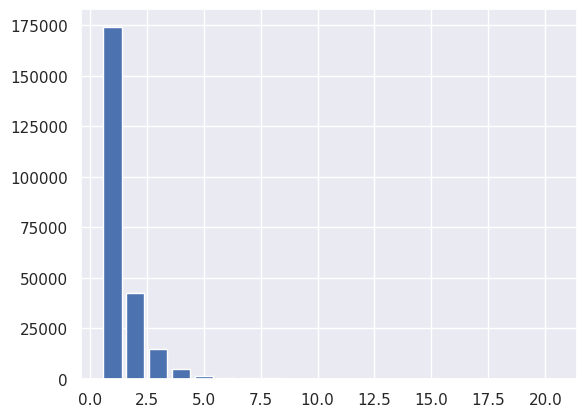

In [7]:
plt.bar(lista_distinct, lista_count)
plt.show()

## Salvando o grafo

In [8]:
gt_save(g, 'git_hub_original.net.gz')

## Renderizando o grafo

In [9]:
g = gt_load('git_hub_original.net.gz')
r = netpixi.render('git_hub_original.net.gz')

In [10]:
# mudar a cor de fundo do grafo
r.graph(color=0xffffff)

# mudar a cor e o tamanho dos vértices
r.vertex_default(color=0x000000, size=10)

# mudar um vértice específico a partir de seu id
r.vertex(0, color=0xff0000, size=20)
r.vertex(1, color=0xff0000, size=20)

# mudar a cor, a espessura e a curvatura das arestas
r.edge_default(color=0x000000, width=1, curve1=1, curve2=1)

## Limpando o grafo

In [11]:
g = gt_clean(g)
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'git_hub_sfdp.net.gz')
netpixi.render('git_hub_sfdp.net.gz', infinite=True);